# Deep learning Practical Assignment #2
### Realised by : Imene Chaâri , Achraf Fares & Aycha Cherif
####  

# Fully connected networks

In [1]:
!pip install -U scikit-learn
!pip install tensorflow

Requirement already up-to-date: scikit-learn in c:\users\imene\anaconda3\lib\site-packages (1.0.1)


# Load the iris dataset


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
X,y = load_iris(return_X_y=True)

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
len(X)

150

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
len(y)

150

# Using Keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#### Convert target into one hot encoding

One hot encoding is used to convert categorical data to binary integer data. In our case we already have integer labels, however using this representation and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results.

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [8]:
Y = pd.get_dummies(y).values

In [9]:
print(Y[:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size=0.2,stratify=y,random_state=500)

We will start experiencing with different models : number of layers and neurons in each layer, activation functions,etc... And we will evaluate each one of the models using different metrics: accuracy, recall,etc...

#### Model n°1
Number of hidden layers : 2

Number of neurons in each layer : 10

Activation functions: ReLu - Softmax


In [11]:
model_1 = Sequential()
model_1.add(Dense(10,activation='relu'))
model_1.add(Dense(10,activation='relu'))
model_1.add(Dense(3,activation="softmax"))


model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(X_train, y_train, batch_size=5, epochs=50,validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 0s 6ms/step - loss: 1.7797 - accuracy: 0.3148 - val_loss: 1.1726 - val_accuracy: 0.5000
Epoch 2/50
22/22 [==============================] - 0s 1ms/step - loss: 1.1997 - accuracy: 0.3426 - val_loss: 1.2197 - val_accuracy: 0.2500
Epoch 3/50
22/22 [==============================] - 0s 1ms/step - loss: 1.1336 - accuracy: 0.3426 - val_loss: 1.2223 - val_accuracy: 0.2500
Epoch 4/50
22/22 [==============================] - 0s 1ms/step - loss: 1.0813 - accuracy: 0.3519 - val_loss: 1.1463 - val_accuracy: 0.2500
Epoch 5/50
22/22 [==============================] - 0s 1ms/step - loss: 1.0388 - accuracy: 0.3519 - val_loss: 1.1158 - val_accuracy: 0.2500
Epoch 6/50
22/22 [==============================] - 0s 1ms/step - loss: 0.9903 - accuracy: 0.3519 - val_loss: 1.0561 - val_accuracy: 0.4167
Epoch 7/50
22/22 [==============================] - 0s 1ms/step - loss: 0.9420 - accuracy: 0.5741 - val_loss: 1.0054 - val_accuracy: 0.5000
Epoch 8/50
22/22 [==

In [12]:
model_1.summary()
y_pred = model_1.predict(X_test)
predictions = np.argmax(y_pred,axis=1)
print(classification_report(np.argmax(y_test,axis=1),predictions))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Model n°2
Number of hidden layers : 3

Number of neurons in each layer : 20

Activation functions: ReLu - Softmax


In [13]:
model_2 = Sequential()
model_2.add(Dense(20,activation='relu'))
model_2.add(Dense(20,activation='relu'))
model_2.add(Dense(20,activation='relu'))
model_2.add(Dense(3,activation="softmax"))


model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train, y_train, batch_size=5, epochs=50,validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 0.9450 - accuracy: 0.6667 - val_loss: 0.8448 - val_accuracy: 0.5833
Epoch 2/50
22/22 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.6852 - val_loss: 0.7188 - val_accuracy: 0.5833
Epoch 3/50
22/22 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7315 - val_loss: 0.6099 - val_accuracy: 0.5833
Epoch 4/50
22/22 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8519 - val_loss: 0.5367 - val_accuracy: 0.6667
Epoch 5/50
22/22 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.9259 - val_loss: 0.4289 - val_accuracy: 0.9167
Epoch 6/50
22/22 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.9722 - val_loss: 0.4234 - val_accuracy: 0.7500
Epoch 7/50
22/22 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.9444 - val_loss: 0.3066 - val_accuracy: 1.0000
Epoch 8/50
22/22 [==

In [14]:
model_2.summary()
y_pred = model_2.predict(X_test)
predictions = np.argmax(y_pred,axis=1)
print(classification_report(np.argmax(y_test,axis=1),predictions))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 63        
Total params: 1,003
Trainable params: 1,003
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                    

###### Conclusion

As we added a layer and doubled the numbers of neurons in each layer, the performance stayed the same, with an accuracy of 0.97 which is considered a good value.

# Working towards CNN

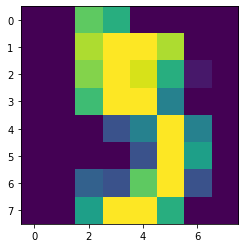

In [15]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

X,y = load_digits(return_X_y=True)
plt.imshow(X[5].reshape((8,8)))

In [16]:
Y = pd.get_dummies(y).values
list(set(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size=0.2,stratify=y,random_state=500)

#### Model n°3

In [18]:
model_3 = Sequential()

model_3.add(Dense(10,activation='relu'))
model_3.add(Dense(10,activation='relu'))
model_3.add(Dense(10,activation="softmax"))

model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(X_train, y_train, batch_size=5, epochs=26,validation_split=0.1)

Epoch 1/26
259/259 [==============================] - 0s 791us/step - loss: 2.2136 - accuracy: 0.2428 - val_loss: 1.6567 - val_accuracy: 0.3611
Epoch 2/26
259/259 [==============================] - 0s 506us/step - loss: 1.3569 - accuracy: 0.5112 - val_loss: 1.0159 - val_accuracy: 0.6806
Epoch 3/26
259/259 [==============================] - 0s 503us/step - loss: 0.8408 - accuracy: 0.7208 - val_loss: 0.6550 - val_accuracy: 0.8125
Epoch 4/26
259/259 [==============================] - 0s 506us/step - loss: 0.5806 - accuracy: 0.8159 - val_loss: 0.5457 - val_accuracy: 0.8472
Epoch 5/26
259/259 [==============================] - 0s 506us/step - loss: 0.4565 - accuracy: 0.8546 - val_loss: 0.4646 - val_accuracy: 0.8542
Epoch 6/26
259/259 [==============================] - 0s 506us/step - loss: 0.3803 - accuracy: 0.8739 - val_loss: 0.4330 - val_accuracy: 0.8819
Epoch 7/26
259/259 [==============================] - 0s 510us/step - loss: 0.3324 - accuracy: 0.8886 - val_loss: 0.4121 - val_accuracy:

In [19]:
model_3.summary()
y_pred = model_3.predict(X_test)
predictions = np.argmax(y_pred,axis=1)
print(classification_report(np.argmax(y_test,axis=1),predictions))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.91      0.86      0.89        36
           2       1.00      1.00      1.00        35
           3       0.93      1.00      0.96        37
           4       0.90      1.00      0.95        36
           5       0.94      0.86      0.90        37
       

#### Model n°4

In [20]:
model_4 = Sequential()

model_4.add(Dense(40,activation='relu'))
model_4.add(Dense(30,activation='relu'))
model_4.add(Dense(20,activation='relu'))
model_4.add(Dense(10,activation='relu'))
model_4.add(Dense(10,activation="softmax"))

model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_4.fit(X_train, y_train, batch_size=5, epochs=26,validation_split=0.1)

Epoch 1/26
259/259 [==============================] - 0s 858us/step - loss: 1.6669 - accuracy: 0.4733 - val_loss: 0.8383 - val_accuracy: 0.7569
Epoch 2/26
259/259 [==============================] - 0s 553us/step - loss: 0.5796 - accuracy: 0.8345 - val_loss: 0.4459 - val_accuracy: 0.8889
Epoch 3/26
259/259 [==============================] - 0s 580us/step - loss: 0.2923 - accuracy: 0.9111 - val_loss: 0.3414 - val_accuracy: 0.8958
Epoch 4/26
259/259 [==============================] - 0s 626us/step - loss: 0.1728 - accuracy: 0.9466 - val_loss: 0.3150 - val_accuracy: 0.9167
Epoch 5/26
259/259 [==============================] - 0s 553us/step - loss: 0.1361 - accuracy: 0.9613 - val_loss: 0.2898 - val_accuracy: 0.8958
Epoch 6/26
259/259 [==============================] - 0s 553us/step - loss: 0.0953 - accuracy: 0.9760 - val_loss: 0.2606 - val_accuracy: 0.9167
Epoch 7/26
259/259 [==============================] - 0s 615us/step - loss: 0.0753 - accuracy: 0.9814 - val_loss: 0.2650 - val_accuracy:

In [21]:
model_4.summary()
y_pred = model_4.predict(X_test)
predictions = np.argmax(y_pred,axis=1)
print(classification_report(np.argmax(y_test,axis=1),predictions))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                2600      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 4,770
Trainable params: 4,770
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
         

# Olivetti faces datset

In [1]:
from sklearn.datasets import fetch_olivetti_faces

# Load faces data
faces, y = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=100)
n_samples, n_features = faces.shape


In [23]:
faces.shape

(400, 4096)

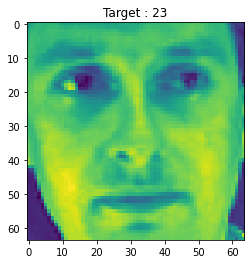

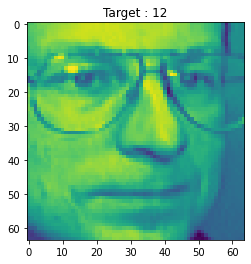

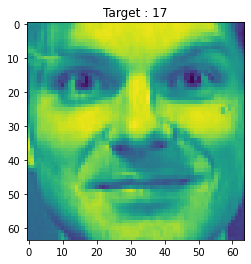

In [24]:
for i in np.random.randint(0,100,3):
  plt.imshow(faces[i].reshape(64,64))
  plt.title("Target : {}".format(y[i]))
  plt.show()

In [4]:
X_train, X_test, y_train, y_test  = train_test_split(faces,y,test_size=0.2,stratify=y,random_state=500)

#### Model n°1

In [ ]:
face_model = Sequential()

face_model.add(Dense(50,activation="relu"))
face_model.add(Dense(50,activation="relu"))
face_model.add(Dense(50,activation='relu'))
face_model.add(Dense(40,activation="softmax"))

face_model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

face_model.fit(X_train, y_train, epochs = 50 , batch_size = 50, validation_split=0.1)

In [ ]:
face_model.summary()
predictions = np.argmax(face_model.predict(X_test),axis=1)
pd.DataFrame(classification_report(y_test,predictions, output_dict = True))

#### Model n°2

In [11]:
face_model1 = Sequential()

face_model1.add(Dense(50,activation="relu"))
face_model1.add(Dense(50,activation="relu"))
face_model1.add(Dense(50,activation="relu"))
face_model1.add(Dense(40,activation="softmax"))

face_model1.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

face_model1.fit(X_train, y_train, epochs = 50 , batch_size = 50, validation_split=0.1)

Epoch 1/50
6/6 [==============================] - 0s 19ms/step - loss: 3.7827 - accuracy: 0.0139 - val_loss: 3.6718 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 3.7340 - accuracy: 0.0382 - val_loss: 3.6619 - val_accuracy: 0.0312
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 3.7064 - accuracy: 0.0278 - val_loss: 3.6610 - val_accuracy: 0.1250
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 3.7000 - accuracy: 0.0278 - val_loss: 3.7133 - val_accuracy: 0.0312
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 3.7276 - accuracy: 0.0278 - val_loss: 3.7006 - val_accuracy: 0.0938
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 3.6757 - accuracy: 0.0382 - val_loss: 3.6767 - val_accuracy: 0.0312
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 3.6761 - accuracy: 0.0278 - val_loss: 3.6928 - val_accuracy: 0.0000e+00
Epoch 8/50
6/6 [=========

In [12]:
face_model1.summary()
predictions = np.argmax(face_model1.predict(X_test),axis=1)
pd.DataFrame(classification_report(y_test,predictions, output_dict = True))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                204850    
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 40)                2040      
Total params: 211,990
Trainable params: 211,990
Non-trainable params: 0
_________________________________________________________________


C:\Users\Imene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Imene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Imene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.0,0.0,0.250000,0.250000,1.000000,0.333333,0.666667,0.5,...,1.000000,0.666667,0.333333,1.0,0.5,0.0,0.0,0.475,0.463889,0.463889
recall,0.0,0.500000,0.0,0.0,0.500000,0.500000,0.500000,1.000000,1.000000,0.5,...,0.500000,1.000000,0.500000,1.0,0.5,0.0,0.0,0.475,0.475000,0.475000
f1-score,0.0,0.666667,0.0,0.0,0.333333,0.333333,0.666667,0.500000,0.800000,0.5,...,0.666667,0.800000,0.400000,1.0,0.5,0.0,0.0,0.475,0.436591,0.436591
support,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,...,2.000000,2.000000,2.000000,2.0,2.0,2.0,2.0,0.475,80.000000,80.000000


#### Conclusion

We exceeded 0.3 accuracy with a model of 3 hidden layers having 50 neurons each (211,990 parameters in total) and trained with 50 epochs.
while dealing with the iris datset we could achieve 0.97 accuracy with only 2 hidden layers having 10 neurons each.
Image data is complex in contrast with the iris dataset. That's why fully connected networks are not very performant when dealing with image datasets. 
That's why we need to use CNNs instead.

# CNN

In [28]:
faces_cnn = faces.reshape((400,1,64,64))

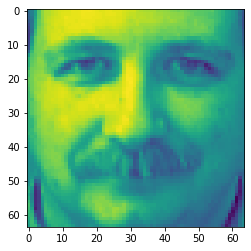

In [29]:
plt.imshow(faces_cnn[0][0])

In [30]:
X_train, X_test, y_train, y_test  = train_test_split(faces_cnn,y,test_size=0.2,stratify=y,random_state=500)

In [31]:
X_train.shape

(320, 1, 64, 64)

In [32]:
from tensorflow.keras.layers import Conv2D,Flatten

faces_model_CNN = Sequential()

faces_model_CNN.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(1,64,64),activation="relu",padding="same"))
faces_model_CNN.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
faces_model_CNN.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"))
faces_model_CNN.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same"))
faces_model_CNN.add(Flatten())
faces_model_CNN.add(Dense(100,activation="relu"))

faces_model_CNN.add(Dense(40,activation="softmax"))


In [33]:
from tensorflow.keras.optimizers import Adam

In [34]:
faces_model_CNN.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
faces_model_CNN.fit(X_train, y_train,validation_split=0.1,epochs = 50,batch_size = 50)

Epoch 1/50
6/6 [==============================] - 0s 35ms/step - loss: 3.6892 - accuracy: 0.0278 - val_loss: 3.6856 - val_accuracy: 0.0312
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 3.6879 - accuracy: 0.0243 - val_loss: 3.6854 - val_accuracy: 0.0312
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 3.6869 - accuracy: 0.0243 - val_loss: 3.6853 - val_accuracy: 0.0312
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 3.6861 - accuracy: 0.0243 - val_loss: 3.6850 - val_accuracy: 0.0312
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 3.6850 - accuracy: 0.0243 - val_loss: 3.6844 - val_accuracy: 0.0312
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 3.6842 - accuracy: 0.0243 - val_loss: 3.6835 - val_accuracy: 0.0312
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 3.6829 - accuracy: 0.0243 - val_loss: 3.6829 - val_accuracy: 0.0312
Epoch 8/50
6/6 [===========

In [36]:
faces_model_CNN.summary()
predictions = np.argmax(faces_model_CNN.predict(X_test),axis=1)
pd.DataFrame(classification_report(y_test,predictions, output_dict = True))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 64, 64)         36928     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 64, 32)         18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 64, 16)         4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 64, 8)          1160      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_20 (Dense)             (None, 40)               

C:\Users\Imene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Imene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Imene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,accuracy,macro avg,weighted avg
precision,0.0,0.666667,0.0,0.0,0.0,0.333333,0.0,0.250000,0.333333,0.666667,...,0.500000,0.500000,0.250000,1.0,0.0,0.500000,0.0,0.45,0.324583,0.324583
recall,0.0,1.000000,0.0,0.0,0.0,0.500000,0.0,0.500000,1.000000,1.000000,...,1.000000,1.000000,0.500000,1.0,0.0,1.000000,0.0,0.45,0.450000,0.450000
f1-score,0.0,0.800000,0.0,0.0,0.0,0.400000,0.0,0.333333,0.500000,0.800000,...,0.666667,0.666667,0.333333,1.0,0.0,0.666667,0.0,0.45,0.358452,0.358452
support,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.0,0.45,80.000000,80.000000
